# Preprocessing for Audio Classification: Trimming Silence

In [96]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import librosa

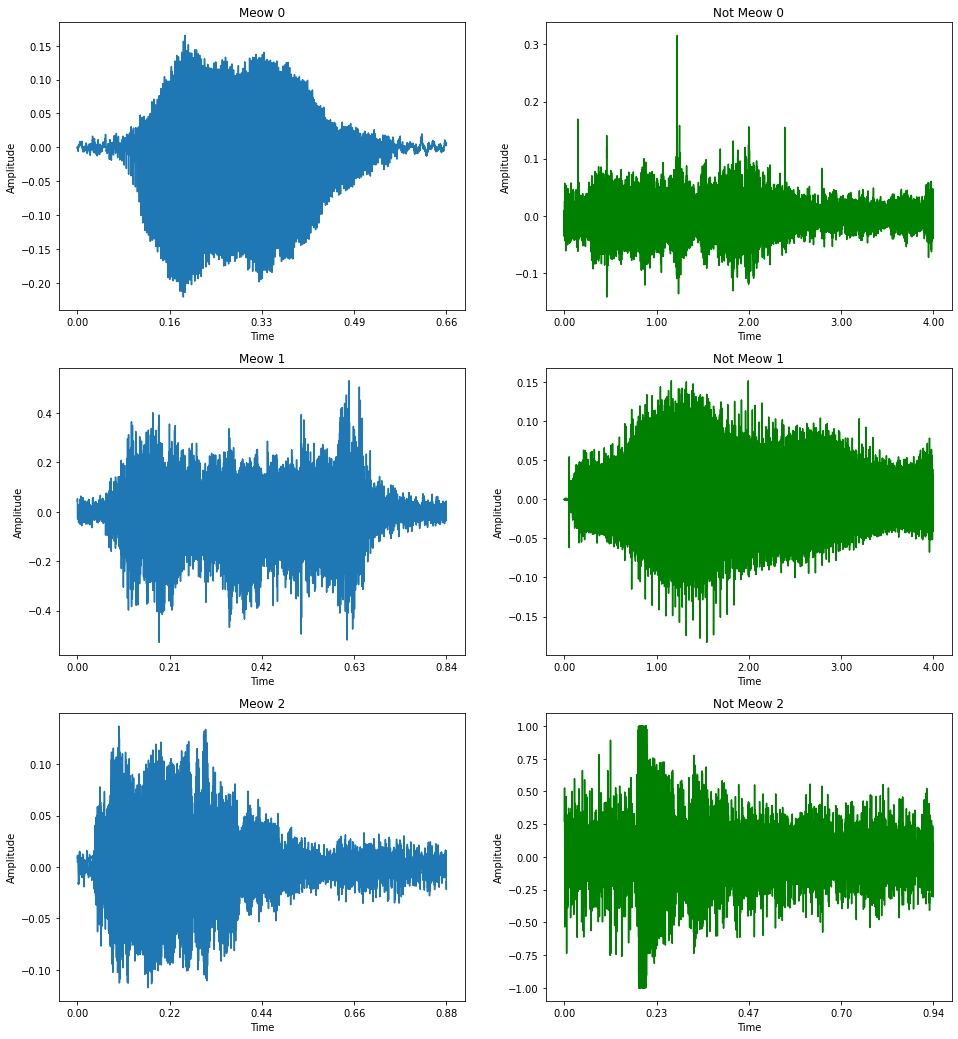

In [97]:
meow_paths = [
    './data/meow/youtube_Q2WxLrS94RM_117.wav',
    './data/meow/youtube_yKb90ItHtn0_72.wav',
    './data/meow/youtube_nX1YzS_CYIw_30.wav'
]

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(16, 18))
for i, meow_path in enumerate(meow_paths):
    y, sr = librosa.load(meow_path, sr=None)
    num_samples = len(y)
    t = np.arange(num_samples)
    axs[i][0].plot(t, y)
    
    t_ticks = np.linspace(0, num_samples, num=5)
    t_tick_labels = ['{:.2f}'.format(t_tick / sr) for t_tick in t_ticks]
    axs[i][0].set_xticks(t_ticks)
    axs[i][0].set_xticklabels(t_tick_labels)
    
    axs[i][0].set_xlabel('Time')
    axs[i][0].set_ylabel('Amplitude')
    
    axs[i][0].set_title(f'Meow {i}')

not_meow_paths = [
    './data/not_meow/169044-2-0-13.wav',
    './data/not_meow/14111-4-0-0.wav',
    './data/not_meow/135544-6-10-0.wav'
]
    
for i, not_meow_path in enumerate(not_meow_paths):
    y, sr = librosa.load(not_meow_path, sr=None)
    num_samples = len(y)
    t = np.arange(num_samples)
    axs[i][1].plot(t, y, color='g')
    
    t_ticks = np.linspace(0, num_samples, num=5)
    t_tick_labels = ['{:.2f}'.format(t_tick / sr) for t_tick in t_ticks]
    axs[i][1].set_xticks(t_ticks)
    axs[i][1].set_xticklabels(t_tick_labels)
    
    axs[i][1].set_xlabel('Time')
    axs[i][1].set_ylabel('Amplitude')
    
    axs[i][1].set_title(f'Not Meow {i}')

In [64]:
# fig.savefig('plot.png', bbox_inches='tight',dpi=80, transparent=True)

In [73]:
def envelope(y, rate, threshold):
    mask = []
    y = pd.Series(y).apply(np.abs)
    y_mean = y.rolling(window=int(rate/20),
                       min_periods=1,
                       center=True).max()
    for mean in y_mean:
        if mean > threshold:
            mask.append(True)
        else:
            mask.append(False)
    return mask, y_mean

In [98]:
window_size = 3
y = pd.Series([0, 3, 2, 5, 7])
y_envelope = y.rolling(window=window_size).max()
y_envelope

0    NaN
1    NaN
2    3.0
3    5.0
4    7.0
dtype: float64

In [100]:
y_envelope = y.rolling(window=window_size, min_periods=1, center=True).max()
y_envelope

0    3.0
1    3.0
2    5.0
3    7.0
4    7.0
dtype: float64

Text(0.5, 1.0, 'Meow 0 w/ Envelope')

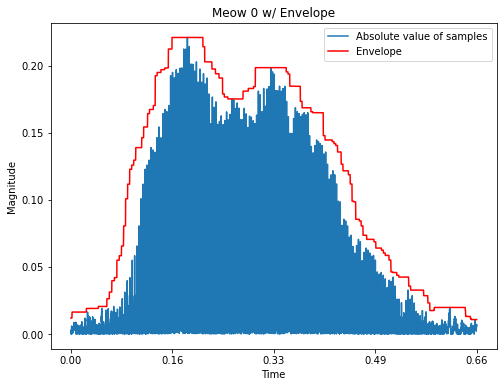

In [101]:
y, sr = librosa.load(meow_paths[0], sr=None)
y_abs = pd.Series(y).apply(np.abs)
y_envelope = y_abs.rolling(window=int(sr/20), min_periods=1, center=True).max()

fig, ax = plt.subplots(figsize=(8, 6))
    
num_samples = len(y)
t = np.arange(num_samples)
ax.plot(t, y_abs, label='Absolute value of samples')
ax.plot(t, y_envelope, color='red', label='Envelope')

t_ticks = np.linspace(0, num_samples, num=5)
t_tick_labels = ['{:.2f}'.format(t_tick / sr) for t_tick in t_ticks]
ax.set_xticks(t_ticks)
ax.set_xticklabels(t_tick_labels)

ax.set_xlabel('Time')
ax.set_ylabel('Magnitude')

ax.legend()

ax.set_title(f'Meow 0 w/ Envelope')

In [102]:
# fig.savefig('plot.png', bbox_inches='tight',dpi=80, transparent=True)

Text(0.5, 1.0, 'Trimmed Meow 0')

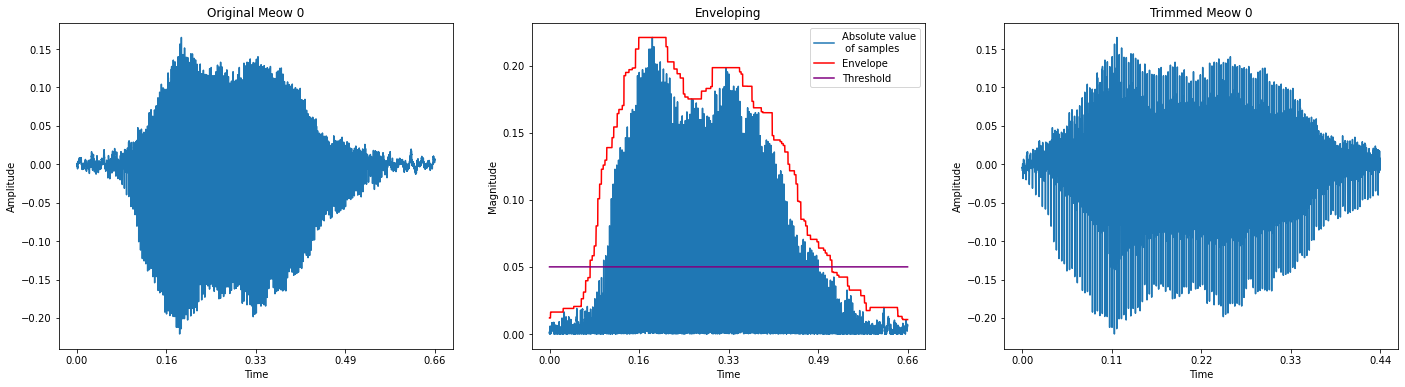

In [103]:
threshold = 0.05
mask, y_envelope = envelope(y, sr, threshold)

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(24, 6))

num_samples = len(y)
t = np.arange(num_samples)
axs[0].plot(t, y)

t_ticks = np.linspace(0, num_samples, num=5)
axs[0].set_xticks(t_ticks)
t_tick_labels = ['{:.2f}'.format(t_tick / sr) for t_tick in t_ticks]
axs[0].set_xticklabels(t_tick_labels)

axs[0].set_xlabel('Time')
axs[0].set_ylabel('Amplitude')

axs[0].set_title(f'Original Meow 0')

####

axs[1].plot(y_abs, label='Absolute value\n of samples')
axs[1].plot(y_envelope, label='Envelope', color='red')
axs[1].plot(np.repeat(threshold, num_samples), label='Threshold', color='purple')

axs[1].set_xticks(t_ticks)
axs[1].set_xticklabels(t_tick_labels)

axs[1].set_xlabel('Time')
axs[1].set_ylabel('Magnitude')

axs[1].legend()

axs[1].set_title(f'Enveloping')

####

y_trimmed = y[mask]
num_trimmed_samples = len(y_trimmed)
t_trimmed = np.arange(num_trimmed_samples)

axs[2].plot(t_trimmed, y_trimmed)

t_ticks = np.linspace(0, num_trimmed_samples, num=5)
t_tick_labels = ['{:.2f}'.format(t_tick / sr) for t_tick in t_ticks]
axs[2].set_xticks(t_ticks)
axs[2].set_xticklabels(t_tick_labels)

plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.title(f'Trimmed Meow 0')

In [104]:
# fig.savefig('trimming_method_1.png', bbox_inches='tight', dpi=80, transparent=True)

Text(0.5, 1.0, 'Trimmed Netwon Meow')

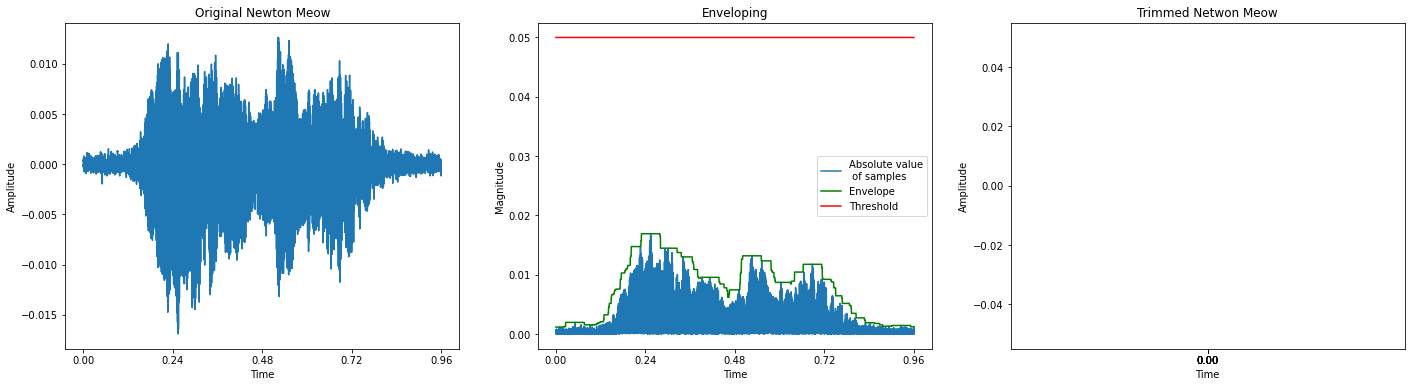

In [105]:
y, sr = librosa.core.load('./data/meow/newton_1.wav', sr=None)
mask, y_envelope = envelope(y, sr, threshold)

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(24, 6))

num_samples = len(y)
t = np.arange(num_samples)
axs[0].plot(t, y)

t_ticks = np.linspace(0, num_samples, num=5)
t_tick_labels = ['{:.2f}'.format(t_tick / sr) for t_tick in t_ticks]
axs[0].set_xticks(t_ticks)
axs[0].set_xticklabels(t_tick_labels)

axs[0].set_xlabel('Time')
axs[0].set_ylabel('Amplitude')

axs[0].set_title(f'Original Newton Meow')

####

y_abs = abs(y)

axs[1].plot(y_abs, label='Absolute value\n of samples')
axs[1].plot(y_envelope, label='Envelope', color='green')
axs[1].plot(np.repeat(threshold, num_samples), label='Threshold', color='red')

axs[1].set_xticks(t_ticks)
axs[1].set_xticklabels(t_tick_labels)

axs[1].set_xlabel('Time')
axs[1].set_ylabel('Magnitude')

axs[1].legend()

axs[1].set_title(f'Enveloping')

####

y_trimmed = y[mask]
num_trimmed_samples = len(y_trimmed)
t_trimmed = np.arange(num_trimmed_samples)

axs[2].plot(t_trimmed, y_trimmed)

t_ticks = np.linspace(0, num_trimmed_samples, num=5)
t_tick_labels = ['{:.2f}'.format(t_tick / sr) for t_tick in t_ticks]
axs[2].set_xticks(t_ticks)
axs[2].set_xticklabels(t_tick_labels)

axs[2].set_xlabel('Time')
axs[2].set_ylabel('Amplitude')

axs[2].set_title(f'Trimmed Netwon Meow')

In [106]:
# fig.savefig('destructive_trimming_method_1.png', bbox_inches='tight', dpi=80, transparent=True)

Text(0.5, 1.0, 'Newton Example Trimmed')

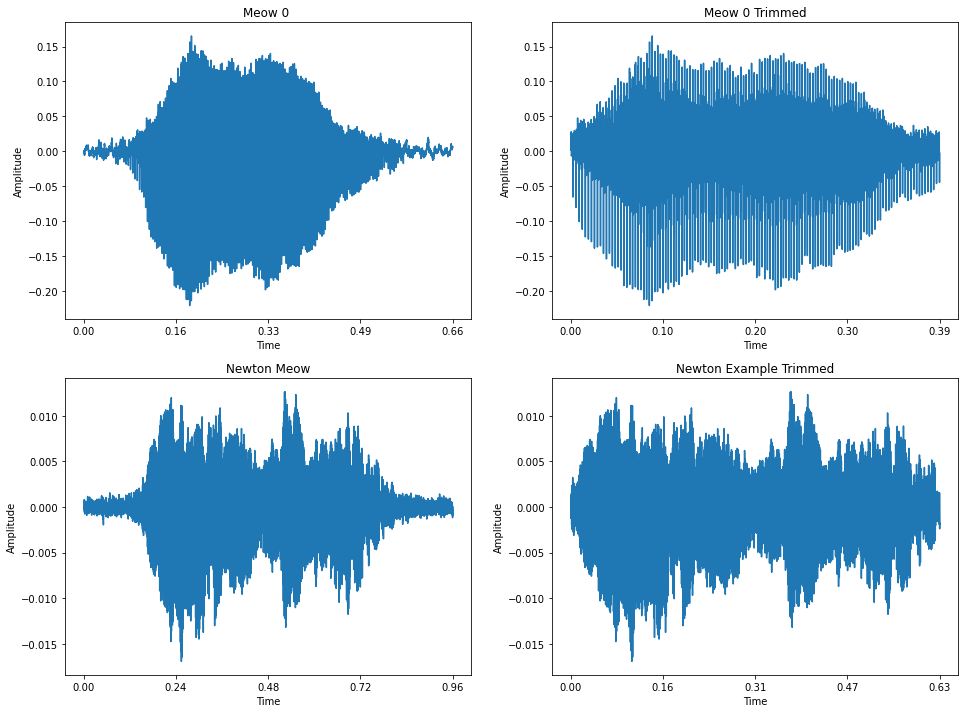

In [108]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

youtube_meow, sr = librosa.core.load('./data/meow/youtube_Q2WxLrS94RM_117.wav',
                                     sr=None)
num_samples = len(youtube_meow)
t = np.arange(num_samples)
axs[0][0].plot(t, youtube_meow)

t_ticks = np.linspace(0, num_samples, num=5)
t_tick_labels = ['{:.2f}'.format(t_tick / sr) for t_tick in t_ticks]
axs[0][0].set_xticks(t_ticks)
axs[0][0].set_xticklabels(t_tick_labels)

axs[0][0].set_xlabel('Time')
axs[0][0].set_ylabel('Amplitude')

axs[0][0].set_title('Meow 0 ')

####

top_db = 12
youtube_meow_trimmed = librosa.effects.trim(youtube_meow, top_db=top_db)[0]
num_samples_trimmed = len(youtube_meow_trimmed)
t_trimmed = np.arange(num_samples_trimmed)
axs[0][1].plot(t_trimmed, youtube_meow_trimmed)

t_ticks = np.linspace(0, num_samples_trimmed, num=5)
t_tick_labels = ['{:.2f}'.format(t_tick / sr) for t_tick in t_ticks]
axs[0][1].set_xticks(t_ticks)
axs[0][1].set_xticklabels(t_tick_labels)

axs[0][1].set_xlabel('Time')
axs[0][1].set_ylabel('Amplitude')

axs[0][1].set_title(f'Meow 0 Trimmed')

####

newton_meow, sr = librosa.core.load('./data/meow/newton_1.wav', sr=None)
num_samples = len(newton_meow)
t = np.arange(num_samples)
axs[1][0].plot(t, newton_meow)

t_ticks = np.linspace(0, num_samples, num=5)
t_tick_labels = ['{:.2f}'.format(t_tick / sr) for t_tick in t_ticks]
axs[1][0].set_xticks(t_ticks)
axs[1][0].set_xticklabels(t_tick_labels)

axs[1][0].set_xlabel('Time')
axs[1][0].set_ylabel('Amplitude')

axs[1][0].set_title('Newton Meow')

####

newton_meow_trimmed = librosa.effects.trim(newton_meow, top_db=top_db)[0]
num_samples_trimmed = len(newton_meow_trimmed)
t_trimmed = np.arange(num_samples_trimmed)
axs[1][1].plot(t_trimmed, newton_meow_trimmed)

t_ticks = np.linspace(0, num_samples_trimmed, num=5)
t_tick_labels = ['{:.2f}'.format(t_tick / sr) for t_tick in t_ticks]
axs[1][1].set_xticks(t_ticks)
axs[1][1].set_xticklabels(t_tick_labels)

axs[1][1].set_xlabel('Time')
axs[1][1].set_ylabel('Amplitude')

axs[1][1].set_title(f'Newton Example Trimmed')

In [ ]:
# fig.savefig('plot.png', bbox_inches='tight',dpi=80, transparent=True)